# Jonathan's Project Notes


## Bollinger Bands

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


In [2]:
# Load env data
load_dotenv()


True

In [3]:
# Assign Alpaca keys to variables
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")


In [4]:
# Initialize Alpaca connection
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [5]:
# Set start and end dates for
start_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-06-20', tz='America/New_York').isoformat()


In [6]:
# Assign default ticker symbol
ticker = ['JPM']


In [7]:
# Assign default time frame
timeframe = '15Min'


In [8]:
# Get ticker historical data
df_ohlc = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date
).df


In [9]:
# Verify data in dataframe
df_ohlc = df_ohlc['JPM']
df_ohlc.head()


,open,high,low,close,volume
time,,,,,
2020-01-02 09:30:00-05:00,140.070,140.14,139.52,139.670,29953
2020-01-02 09:45:00-05:00,139.675,139.91,139.44,139.670,24343
2020-01-02 10:00:00-05:00,139.635,139.81,139.52,139.640,19021
2020-01-02 10:15:00-05:00,139.600,139.60,139.34,139.400,18856
2020-01-02 10:30:00-05:00,139.460,139.54,139.28,139.535,19695


In [10]:
# Window size
bollinger_band_window = 5
num_standard_deviation = 2

# Calculate mean and standard deviation
df_ohlc['bollinger_band_middle'] = df_ohlc['close'].rolling(window=bollinger_band_window).mean()
df_ohlc['bollinger_band_std'] = df_ohlc['close'].rolling(window=bollinger_band_window).std()

# Calculate upper bollinger band and lower bollinger band
df_ohlc['bollinger_band_upper'] = df_ohlc['bollinger_band_middle'] + (df_ohlc['bollinger_band_std'] * num_standard_deviation)
df_ohlc['bollinger_band_lower'] = df_ohlc['bollinger_band_middle'] - (df_ohlc['bollinger_band_std'] * num_standard_deviation)

df_ohlc.head()


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower
time,,,,,,,,,
2020-01-02 09:30:00-05:00,140.070,140.14,139.52,139.670,29953,NaN,NaN,NaN,NaN
2020-01-02 09:45:00-05:00,139.675,139.91,139.44,139.670,24343,NaN,NaN,NaN,NaN
2020-01-02 10:00:00-05:00,139.635,139.81,139.52,139.640,19021,NaN,NaN,NaN,NaN
2020-01-02 10:15:00-05:00,139.600,139.60,139.34,139.400,18856,NaN,NaN,NaN,NaN
2020-01-02 10:30:00-05:00,139.460,139.54,139.28,139.535,19695,139.583,0.116383,139.815766,139.350234


In [11]:
#df_ohlc.drop_duplicates(subset='bollinger_band_middle', keep=False, inplace=True)


<AxesSubplot:xlabel='time'>

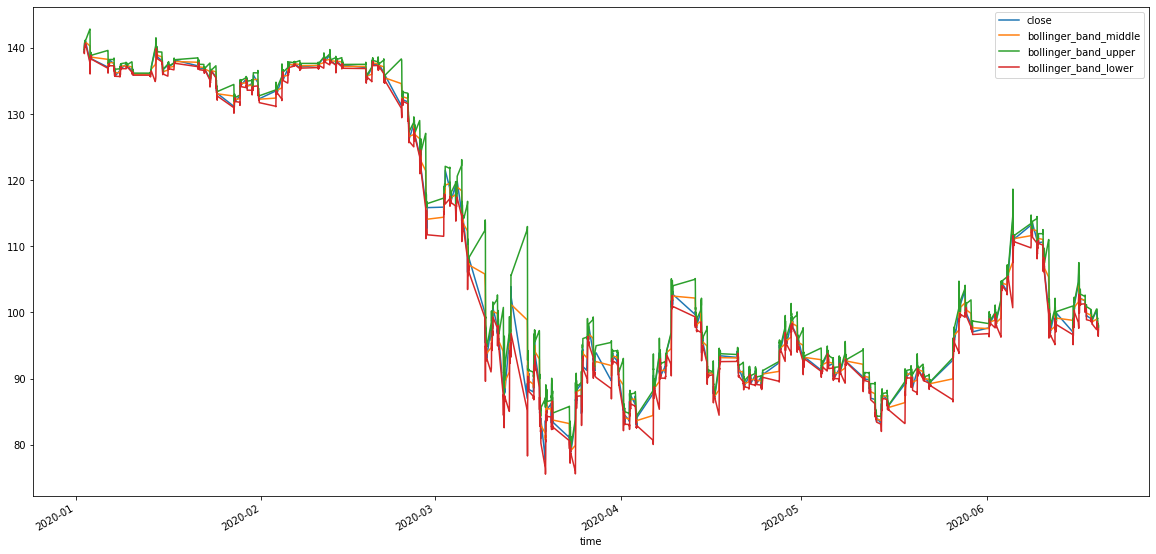

In [12]:
# Plot Bollinger Bands with closing prices to visually see data
df_ohlc[['close', 'bollinger_band_middle', 'bollinger_band_upper', 'bollinger_band_lower']].plot(figsize=(20,10))
